In [37]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

In [39]:
pop = pd.read_csv('data/위도경도_최종.csv', encoding='utf-8')
pop.head()

,ID,광역시도,시군구,격자 X,격자 Y
0,서울 종로,서울특별시,종로구,60,127
1,서울 중구,서울특별시,중구,60,127
2,서울 용산,서울특별시,용산구,60,126
3,서울 성동,서울특별시,성동구,61,127
4,서울 광진,서울특별시,광진구,62,126


- 지도 모양 보기

In [40]:
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,춘천,인제,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,양평,평창,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,여주,정선,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,이천,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,하남,영월,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,태백,봉화,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 처인,영주,영양,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 수지,용인 기흥,예천,영덕,NaN,NaN


In [41]:
# table 모양을 변경
map_raw.stack()[:10]

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         춘천
dtype: object

In [42]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [43]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


- 광역시 경계를 포함하여 그리기

In [44]:
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus

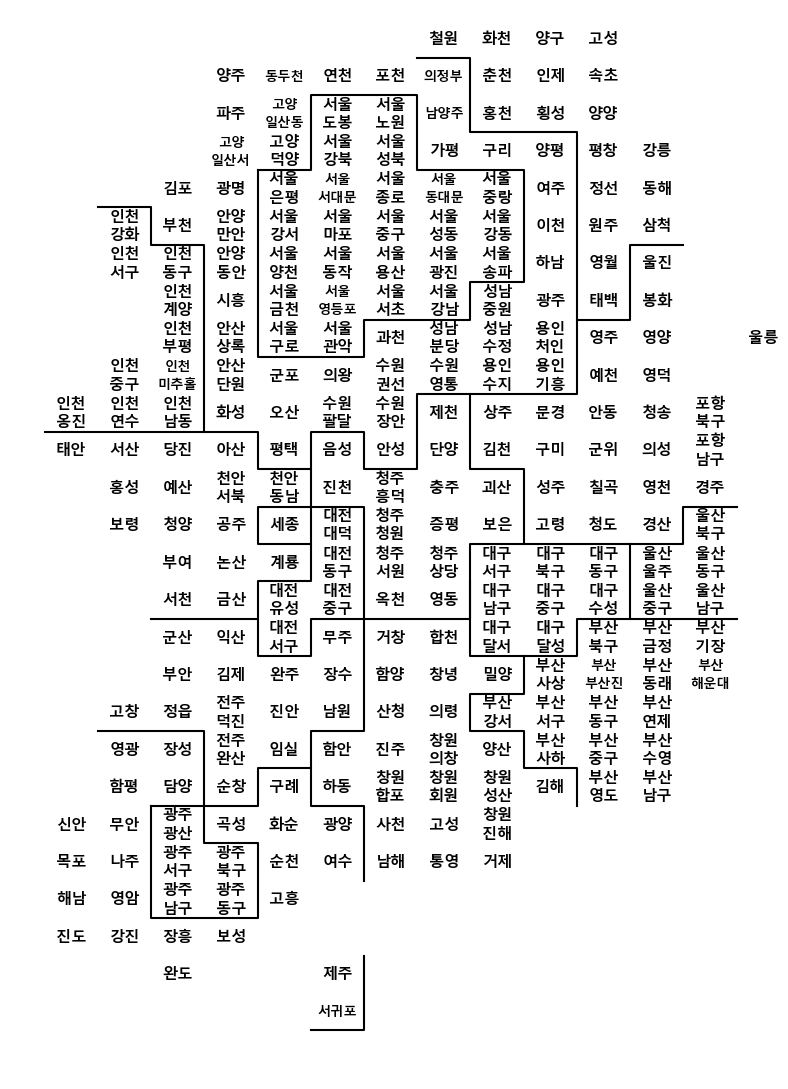

In [45]:
plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

- pop, map 병합

In [46]:
pop = pd.merge(pop, map)
pop.head()

,ID,광역시도,시군구,격자 X,격자 Y,y,x
0,서울 종로,서울특별시,종로구,60,127,4,6
1,서울 중구,서울특별시,중구,60,127,5,6
2,서울 용산,서울특별시,용산구,60,126,6,6
3,서울 성동,서울특별시,성동구,61,127,5,7
4,서울 광진,서울특별시,광진구,62,126,6,7


In [47]:
# csv파일로 저장
pop.to_csv('data/카토그램.csv', encoding='utf-8')

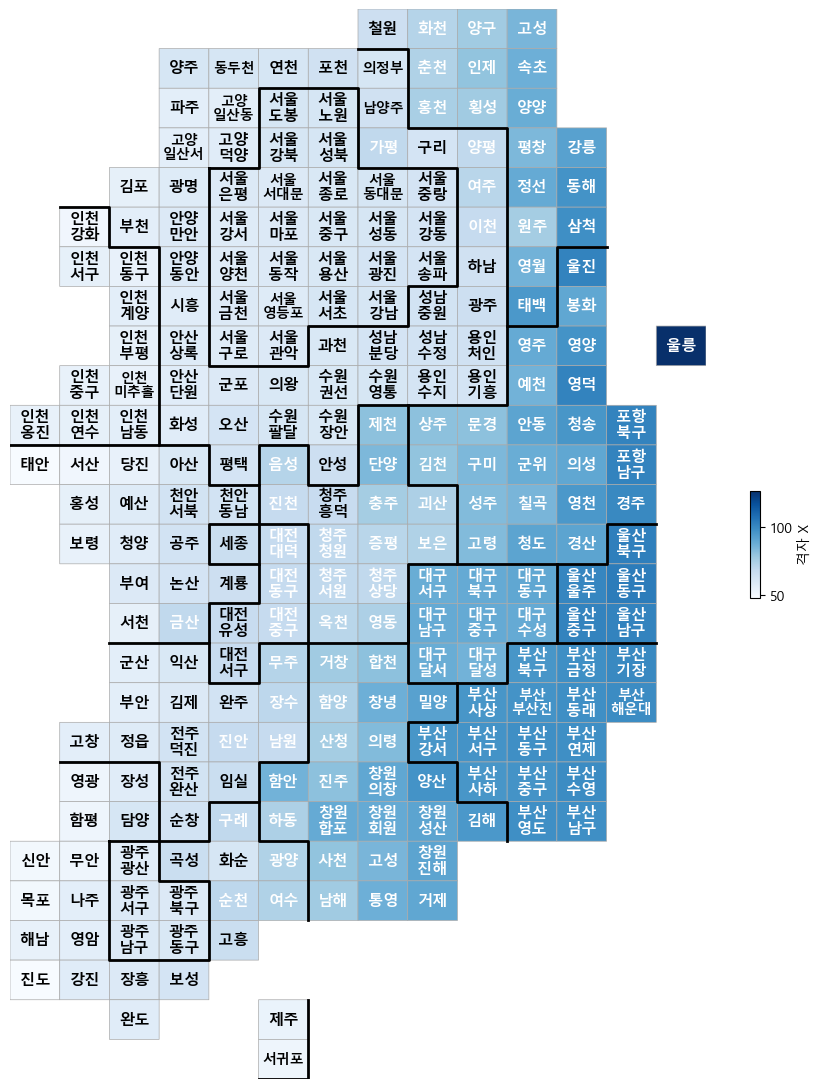

In [48]:
drawKorea('격자 X', pop, 'Blues')